# Starting Off

How does sklearn utilize numpy?

# How to build a Deep Neural Network with Python

## Model building steps:

1. Specify Architecture

2. Compile

3. Fit 

4. Predict

## Specify the architecture

## Compiling a model 

- Specify the optimizer
    - Many options and mathematically complex
    - “Adam” is usually a good choice 
- Loss function
    - “mean_squared_error” common for regression

In [1]:
'''#instantiate the model
model = Sequential()
#create a hidden layer and the input layer
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
#add one hidden layer
model.add(Dense(100, activation='relu'))
#add the final layer
model.add(Dense(1))'''

"#instantiate the model\nmodel = Sequential()\n#create a hidden layer and the input layer\nmodel.add(Dense(100, activation='relu', input_shape = (n_cols,)))\n#add one hidden layer\nmodel.add(Dense(100, activation='relu'))\n#add the final layer\nmodel.add(Dense(1))"

In [2]:
'''model.compile(optimizer='adam', loss='mean_squared_error')'''

"model.compile(optimizer='adam', loss='mean_squared_error')"

## Fitting a model

- Applying backpropagation and gradient descent with your data to update the weights
- Scaling data before fi!ing can ease optimization

In [3]:
# Train neural network
'''model.fit(features, # Features
                      target, # Target
                      epochs=15, # Number of epochs
                      verbose=2, # Some output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation'''

'model.fit(features, # Features\n                      target, # Target\n                      epochs=15, # Number of epochs\n                      verbose=2, # Some output\n                      batch_size=100, # Number of observations per batch\n                      validation_data=(X_test, y_test)) # Data for evaluation'

In [4]:
'''model.predict(features)'''

'model.predict(features)'

## Applied:Create a Regression NN

In [5]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd

Using TensorFlow backend.


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/kc_feat_engineering_project_revamp/kc_housing_data_for_feat_engineering_lab.csv', index_col = 0)

In [7]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166
7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,0,98053,47.6561,-122.005,4760,101930,16,2014,3,14.018451
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,22,2014,3,12.458775
2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,54,2015,2,12.583995
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,...,0,98146,47.5123,-122.337,1780,8113,57,2015,2,12.343658


In [8]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'since_sold',
       ]

In [9]:
y = df['price']
X = df[features]

In [10]:
len(features)

20

- Store the number of columns in the predictors data to `n_cols`. This has been done for you.
- Start by creating a `Sequential` model called `model`.
- Use the `.add()` method on `model` to add a `Dense` layer.
- Add 50 units, specify `activation='relu'`, and the `input_shape` parameter to be the tuple `(n_cols,)` which means it has `n_cols` items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another `Dense` layer. This should have 32 units and a 'relu' activation.
- Finally, add an output layer, which is a `Dense` layer with a single node. Don't use any activation function here.

In [11]:
# Save the number of columns in predictors: n_cols
n_cols = len(features)

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(64, activation='relu'))

# Add the output layer
model.add(Dense(1))

- Compile the model using `model.compile()`. Your `optimizer` should be `'adam'` and the `loss` should be `'mean_squared_error'`.

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


- Fit the `model`. Remember that the first argument is the predictive features (`predictors`), and the data to be predicted (`target`) is the second argument.

In [13]:
# Fit the model
model.fit(X, # Features
                      y, # Target
                      epochs=20, # Number of epochs
                      verbose=2, # Some output
                      batch_size=500, # Number of observations per batch
                  
         ) # Data for evaluation

Epoch 1/20
 - 0s - loss: 329763573229.0370
Epoch 2/20
 - 0s - loss: 149784110573.0370
Epoch 3/20
 - 0s - loss: 117761237807.4074
Epoch 4/20
 - 0s - loss: 115596603354.0741
Epoch 5/20
 - 0s - loss: 113847277568.0000
Epoch 6/20
 - 0s - loss: 111823658211.5556
Epoch 7/20
 - 0s - loss: 109617619247.4074
Epoch 8/20
 - 0s - loss: 107068077549.0370
Epoch 9/20
 - 0s - loss: 103703495186.9630
Epoch 10/20
 - 0s - loss: 98568787816.2963
Epoch 11/20
 - 0s - loss: 90359743658.6667
Epoch 12/20
 - 0s - loss: 80346699946.6667
Epoch 13/20
 - 0s - loss: 70839655670.5185
Epoch 14/20
 - 0s - loss: 63975897315.5555
Epoch 15/20
 - 0s - loss: 59696546000.5926
Epoch 16/20
 - 0s - loss: 58136496222.8148
Epoch 17/20
 - 0s - loss: 57253964856.8889
Epoch 18/20
 - 0s - loss: 56701666417.7778
Epoch 19/20
 - 0s - loss: 56547137991.1111
Epoch 20/20
 - 0s - loss: 56206946493.6296


## Classification Models


- ‘categorical_crossentropy’ loss function Similar to log loss: Lower is be!er
- Add metrics = [‘accuracy’] to compile step for easy-to- understand diagnostics
- Output layer has separate node for each possible outcome, and uses ‘so"max’ activation

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/cleaned_titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,1


In [15]:
predictors = df.drop(columns=['Survived'])
n_cols = predictors.shape[1]

- Convert `df.Survived` to a categorical variable using the `to_categorical()` function.

In [16]:
from keras.utils import to_categorical
# Convert the target to categorical: target
target = to_categorical(df.Survived)

In [17]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [18]:
n_cols

9

- Specify a `Sequential` model called `model`.
- Add a `Dense` layer with 32 nodes. Use `'relu'` as the `activation` and `(n_cols,)` as the `input_shape`.
- Add the `Dense` output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the `activation` should be `'softmax'`.
- Compile the model, using `'sgd'` as the `optimizer`, `'categorical_crossentropy'` as the loss function, and `metrics=['accuracy']` to see the accuracy (what fraction of predictions were correct) at the end of each epoch.
- Fit the model using the `X_train` and the `y_train`.

In [19]:
from keras.utils import to_categorical

# Convert the target to categorical: target
# target = to_categorical(df.Survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(64, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])


# Fit the model
model.fit(X_train, # Features
                      y_train, # Target
                      epochs=50, # Number of epochs
                      verbose=2, # Some output
                      batch_size=500, # Number of observations per batch
                  
         ) # Data for evaluation

Epoch 1/50
 - 0s - loss: 6.9449 - accuracy: 0.5485
Epoch 2/50
 - 0s - loss: 5.4845 - accuracy: 0.6371
Epoch 3/50
 - 0s - loss: 1.2480 - accuracy: 0.6624
Epoch 4/50
 - 0s - loss: 3.8518 - accuracy: 0.5091
Epoch 5/50
 - 0s - loss: 2.6403 - accuracy: 0.6034
Epoch 6/50
 - 0s - loss: 2.6403 - accuracy: 0.4740
Epoch 7/50
 - 0s - loss: 2.2551 - accuracy: 0.5795
Epoch 8/50
 - 0s - loss: 1.4673 - accuracy: 0.6062
Epoch 9/50
 - 0s - loss: 2.1811 - accuracy: 0.4895
Epoch 10/50
 - 0s - loss: 1.2139 - accuracy: 0.6399
Epoch 11/50
 - 0s - loss: 2.2739 - accuracy: 0.4993
Epoch 12/50
 - 0s - loss: 1.5886 - accuracy: 0.5556
Epoch 13/50
 - 0s - loss: 0.9790 - accuracy: 0.6695
Epoch 14/50
 - 0s - loss: 0.8214 - accuracy: 0.6062
Epoch 15/50
 - 0s - loss: 0.8078 - accuracy: 0.6526
Epoch 16/50
 - 0s - loss: 2.0049 - accuracy: 0.5837
Epoch 17/50
 - 0s - loss: 1.4503 - accuracy: 0.5373
Epoch 18/50
 - 0s - loss: 0.8735 - accuracy: 0.6329
Epoch 19/50
 - 0s - loss: 0.7224 - accuracy: 0.6793
Epoch 20/50
 - 0s - l

## Saving, reloading and using your Model

In [20]:
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('model_file.h5')
# predictions = my_model.predict('X')
# probability_true = predictions[:,1]

- Create your predictions using the model's `.predict()` method on `X_test`.
- Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index `1`) of `predictions`. Store the result in `predicted_prob_true` and print it.

In [21]:
# Calculate predictions: predictions
predictions = my_model.predict(X_test)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.28371468 0.4985484  0.40151876 0.32448488 0.462737   0.28295693
 0.37903813 0.36448216 0.63174355 0.5791533  0.48633012 0.38133258
 0.08740138 0.3963328  0.29312903 0.38602608 0.6812434  0.35118353
 0.4574453  0.3237263  0.48794344 0.5438829  0.14945662 0.45093986
 0.32558694 0.44562876 0.29380697 0.29454157 0.47052938 0.33484027
 0.48636836 0.29014668 0.32558694 0.4741305  0.33397758 0.52596533
 0.47281647 0.975894   0.3703315  0.32558694 0.33108798 0.27757502
 0.4019965  0.30384368 0.42687398 0.44349086 0.41039583 0.3136203
 0.2844002  0.5144695  0.4598686  0.3419985  0.34302524 0.35756093
 0.46482927 0.4779612  0.18784165 0.18585467 0.41056535 0.29396525
 0.28278238 0.30109394 0.5214985  0.40969634 0.296232   0.41893595
 0.10925518 0.5130992  0.6388358  0.5743594  0.35675547 0.8831805
 0.38170087 0.30300134 0.2802833  0.36277673 0.37957564 0.20984338
 0.46020773 0.45472762 0.11315465 0.4677662  0.39160234 0.29014668
 0.38995567 0.31796512 0.15988544 0.4019965  0.3060989  0.325586

## Verify your model structure

In [22]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


## Let's play with Hyperparameter tuning

[Google Playground](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises)

## Hyperparameter Tuning 

    


- **Number of Hidden Layers**

*For many problems you can start with just one or two hidden layers it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers until your model starts to over fit. Very complex tasks, like image classification, will need dozens of layers.*


- **Number of Neurons per layer**

*The number of nuerons for the input and output layers are dependent on your data and the task. For hiddne layers, a common practice is to create a funnel with funnel with fewer and fewer neurons per layer.*

*In general, you will get more bang for your buck by adding on more layers than adding more neurons.*

- **[Activation Functions](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)**
    - Linear
    - Sigmoid
    - Softmax
    - Tanh
    - ReLu
    - elu
    
*In most cases you can use the ReLu activation function (or one of its variants) in the hidden layers. For the output layer, the softmax activation function is generally good for multiclass problems and the sigmouid function for binary classificatin problems. For regression tasks, you can simply use no activation function at all*

- [Selecting an optimizer](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
    - Adam
    - SGD
    - RMSprop
    - Adagrad



- **Learning Rate**

*If you set it too low, training will eventually converge, but it will do so slowly.*
*If you set it too high, it might acutally diverge.*
*If you set it slightly too high, it will converge at first but miss the local optima.*


- **Regularization** 
    - **L1 and L2**
    - **Dropout:**
        
        *Dropout is most popular techniqure for deep neural networks. It is a fairly simple algorithm where at every training step, every neuron has a probability fo being teporarily "droppedout," meaning it will be completely ignored during this traing step, but it may be active during the next step.*
    
    - [Early Stopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
    
    *Just interrupt training whne its performance on the validation set starts dropping*
    
    


[Paper on selecting hyperparameters](https://arxiv.org/pdf/1206.5533v2.pdf)

# Fitting a Model with Keras

## Import  Modules 

In [23]:
# Create first network with Keras
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import SGD


## Define Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

In [24]:
network = Sequential()

# Add a dropout layer for input layer
network.add(Dropout(0.1, input_shape=(n_cols,)))
# Add fully connected layer with a ReLU activation function
network.add(Dense(units=32, activation='relu'))
# Add a dropout layer for previous hidden layer
network.add(Dropout(0.1))
# Add fully connected layer with a ReLU activation function and L2 regularization
network.add(Dense(units=32, kernel_regularizer=regularizers.l2(0.05),activation='relu'))
#Final Layer
network.add(Dense(2, activation='softmax'))

[Using GridSearchCV to tune Neural Networks](https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/)

## Compile model


In [25]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', ])

[Keras Implementation of optimizers](https://keras.io/optimizers/)

[Impact of Learning Rate on MOdel Performance](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

In [26]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

## Fit the Model

In [27]:
# Train neural network
history = network.fit(X_train, # Features
                      y_train, # Target
                      epochs=1000, # Number of epochs
                      verbose=2, # Some output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 711 samples, validate on 178 samples
Epoch 1/1000
 - 0s - loss: 3.8024 - accuracy: 0.3404 - val_loss: 2.6711 - val_accuracy: 0.2921
Epoch 2/1000
 - 0s - loss: 2.7517 - accuracy: 0.4233 - val_loss: 2.1693 - val_accuracy: 0.6404
Epoch 3/1000
 - 0s - loss: 2.3380 - accuracy: 0.5795 - val_loss: 2.0455 - val_accuracy: 0.6910
Epoch 4/1000
 - 0s - loss: 2.2887 - accuracy: 0.6062 - val_loss: 1.9629 - val_accuracy: 0.7191
Epoch 5/1000
 - 0s - loss: 2.1939 - accuracy: 0.6188 - val_loss: 1.8895 - val_accuracy: 0.7191
Epoch 6/1000
 - 0s - loss: 2.0652 - accuracy: 0.6287 - val_loss: 1.8151 - val_accuracy: 0.7135
Epoch 7/1000
 - 0s - loss: 1.9779 - accuracy: 0.6203 - val_loss: 1.7580 - val_accuracy: 0.6742
Epoch 8/1000
 - 0s - loss: 1.9427 - accuracy: 0.5935 - val_loss: 1.7114 - val_accuracy: 0.6517
Epoch 9/1000
 - 0s - loss: 1.8345 - accuracy: 0.6076 - val_loss: 1.6526 - val_accuracy: 0.6742
Epoch 10/1000
 - 0s - loss: 1.8156 - accuracy: 0.6062 - val_loss: 1.6017 - val_accuracy: 0.6798
Epo

Epoch 86/1000
 - 0s - loss: 0.7338 - accuracy: 0.6793 - val_loss: 0.7031 - val_accuracy: 0.6966
Epoch 87/1000
 - 0s - loss: 0.7389 - accuracy: 0.6793 - val_loss: 0.7010 - val_accuracy: 0.6910
Epoch 88/1000
 - 0s - loss: 0.7283 - accuracy: 0.6892 - val_loss: 0.7017 - val_accuracy: 0.7022
Epoch 89/1000
 - 0s - loss: 0.7074 - accuracy: 0.6779 - val_loss: 0.6977 - val_accuracy: 0.7022
Epoch 90/1000
 - 0s - loss: 0.7272 - accuracy: 0.6737 - val_loss: 0.6985 - val_accuracy: 0.7079
Epoch 91/1000
 - 0s - loss: 0.7183 - accuracy: 0.6737 - val_loss: 0.7057 - val_accuracy: 0.6910
Epoch 92/1000
 - 0s - loss: 0.7196 - accuracy: 0.6610 - val_loss: 0.6957 - val_accuracy: 0.7022
Epoch 93/1000
 - 0s - loss: 0.7234 - accuracy: 0.6695 - val_loss: 0.6888 - val_accuracy: 0.7022
Epoch 94/1000
 - 0s - loss: 0.7044 - accuracy: 0.6835 - val_loss: 0.6843 - val_accuracy: 0.6966
Epoch 95/1000
 - 0s - loss: 0.7091 - accuracy: 0.6835 - val_loss: 0.6771 - val_accuracy: 0.6966
Epoch 96/1000
 - 0s - loss: 0.7159 - acc

Epoch 171/1000
 - 0s - loss: 0.6056 - accuracy: 0.7046 - val_loss: 0.5895 - val_accuracy: 0.7303
Epoch 172/1000
 - 0s - loss: 0.6178 - accuracy: 0.6934 - val_loss: 0.5876 - val_accuracy: 0.7079
Epoch 173/1000
 - 0s - loss: 0.5955 - accuracy: 0.7145 - val_loss: 0.5868 - val_accuracy: 0.7135
Epoch 174/1000
 - 0s - loss: 0.5959 - accuracy: 0.7046 - val_loss: 0.5787 - val_accuracy: 0.7135
Epoch 175/1000
 - 0s - loss: 0.5977 - accuracy: 0.6990 - val_loss: 0.5769 - val_accuracy: 0.7079
Epoch 176/1000
 - 0s - loss: 0.5794 - accuracy: 0.7342 - val_loss: 0.5774 - val_accuracy: 0.7303
Epoch 177/1000
 - 0s - loss: 0.6009 - accuracy: 0.7004 - val_loss: 0.5774 - val_accuracy: 0.7360
Epoch 178/1000
 - 0s - loss: 0.6307 - accuracy: 0.6850 - val_loss: 0.5741 - val_accuracy: 0.7303
Epoch 179/1000
 - 0s - loss: 0.6184 - accuracy: 0.7032 - val_loss: 0.5773 - val_accuracy: 0.7416
Epoch 180/1000
 - 0s - loss: 0.6078 - accuracy: 0.7286 - val_loss: 0.5751 - val_accuracy: 0.7416
Epoch 181/1000
 - 0s - loss: 0

Epoch 256/1000
 - 0s - loss: 0.5528 - accuracy: 0.7440 - val_loss: 0.5254 - val_accuracy: 0.7697
Epoch 257/1000
 - 0s - loss: 0.5356 - accuracy: 0.7370 - val_loss: 0.5166 - val_accuracy: 0.7921
Epoch 258/1000
 - 0s - loss: 0.5323 - accuracy: 0.7665 - val_loss: 0.5131 - val_accuracy: 0.7809
Epoch 259/1000
 - 0s - loss: 0.5533 - accuracy: 0.7454 - val_loss: 0.5137 - val_accuracy: 0.7640
Epoch 260/1000
 - 0s - loss: 0.5557 - accuracy: 0.7412 - val_loss: 0.5225 - val_accuracy: 0.7753
Epoch 261/1000
 - 0s - loss: 0.5497 - accuracy: 0.7567 - val_loss: 0.5256 - val_accuracy: 0.7697
Epoch 262/1000
 - 0s - loss: 0.5342 - accuracy: 0.7539 - val_loss: 0.5354 - val_accuracy: 0.7753
Epoch 263/1000
 - 0s - loss: 0.5546 - accuracy: 0.7440 - val_loss: 0.5329 - val_accuracy: 0.7640
Epoch 264/1000
 - 0s - loss: 0.5483 - accuracy: 0.7567 - val_loss: 0.5299 - val_accuracy: 0.7753
Epoch 265/1000
 - 0s - loss: 0.5365 - accuracy: 0.7539 - val_loss: 0.5374 - val_accuracy: 0.7472
Epoch 266/1000
 - 0s - loss: 0

Epoch 341/1000
 - 0s - loss: 0.5105 - accuracy: 0.7764 - val_loss: 0.4909 - val_accuracy: 0.8258
Epoch 342/1000
 - 0s - loss: 0.5245 - accuracy: 0.7834 - val_loss: 0.5022 - val_accuracy: 0.8034
Epoch 343/1000
 - 0s - loss: 0.5324 - accuracy: 0.7511 - val_loss: 0.4958 - val_accuracy: 0.7809
Epoch 344/1000
 - 0s - loss: 0.5020 - accuracy: 0.7778 - val_loss: 0.4980 - val_accuracy: 0.7809
Epoch 345/1000
 - 0s - loss: 0.5199 - accuracy: 0.7707 - val_loss: 0.4913 - val_accuracy: 0.8034
Epoch 346/1000
 - 0s - loss: 0.5177 - accuracy: 0.7736 - val_loss: 0.4942 - val_accuracy: 0.8258
Epoch 347/1000
 - 0s - loss: 0.5060 - accuracy: 0.7679 - val_loss: 0.5071 - val_accuracy: 0.7865
Epoch 348/1000
 - 0s - loss: 0.5144 - accuracy: 0.7750 - val_loss: 0.4933 - val_accuracy: 0.7978
Epoch 349/1000
 - 0s - loss: 0.5157 - accuracy: 0.7637 - val_loss: 0.4890 - val_accuracy: 0.8258
Epoch 350/1000
 - 0s - loss: 0.5025 - accuracy: 0.7834 - val_loss: 0.4869 - val_accuracy: 0.8090
Epoch 351/1000
 - 0s - loss: 0

Epoch 426/1000
 - 0s - loss: 0.4965 - accuracy: 0.7764 - val_loss: 0.4821 - val_accuracy: 0.8202
Epoch 427/1000
 - 0s - loss: 0.4847 - accuracy: 0.7834 - val_loss: 0.4858 - val_accuracy: 0.7865
Epoch 428/1000
 - 0s - loss: 0.4976 - accuracy: 0.7623 - val_loss: 0.4812 - val_accuracy: 0.8202
Epoch 429/1000
 - 0s - loss: 0.5021 - accuracy: 0.7722 - val_loss: 0.4807 - val_accuracy: 0.8146
Epoch 430/1000
 - 0s - loss: 0.4904 - accuracy: 0.7834 - val_loss: 0.4804 - val_accuracy: 0.8258
Epoch 431/1000
 - 0s - loss: 0.5162 - accuracy: 0.7707 - val_loss: 0.4862 - val_accuracy: 0.8090
Epoch 432/1000
 - 0s - loss: 0.4900 - accuracy: 0.7904 - val_loss: 0.4803 - val_accuracy: 0.8146
Epoch 433/1000
 - 0s - loss: 0.5008 - accuracy: 0.7637 - val_loss: 0.4801 - val_accuracy: 0.8146
Epoch 434/1000
 - 0s - loss: 0.5047 - accuracy: 0.7623 - val_loss: 0.4803 - val_accuracy: 0.8258
Epoch 435/1000
 - 0s - loss: 0.5020 - accuracy: 0.7792 - val_loss: 0.4820 - val_accuracy: 0.8146
Epoch 436/1000
 - 0s - loss: 0

Epoch 511/1000
 - 0s - loss: 0.4771 - accuracy: 0.7750 - val_loss: 0.4714 - val_accuracy: 0.8202
Epoch 512/1000
 - 0s - loss: 0.5017 - accuracy: 0.7722 - val_loss: 0.4756 - val_accuracy: 0.8146
Epoch 513/1000
 - 0s - loss: 0.4857 - accuracy: 0.7862 - val_loss: 0.4788 - val_accuracy: 0.8258
Epoch 514/1000
 - 0s - loss: 0.5028 - accuracy: 0.7876 - val_loss: 0.4763 - val_accuracy: 0.8258
Epoch 515/1000
 - 0s - loss: 0.4869 - accuracy: 0.7876 - val_loss: 0.4736 - val_accuracy: 0.8090
Epoch 516/1000
 - 0s - loss: 0.4723 - accuracy: 0.7904 - val_loss: 0.4696 - val_accuracy: 0.7978
Epoch 517/1000
 - 0s - loss: 0.4951 - accuracy: 0.7975 - val_loss: 0.4679 - val_accuracy: 0.8315
Epoch 518/1000
 - 0s - loss: 0.4927 - accuracy: 0.7581 - val_loss: 0.4720 - val_accuracy: 0.8034
Epoch 519/1000
 - 0s - loss: 0.4918 - accuracy: 0.7637 - val_loss: 0.4697 - val_accuracy: 0.8258
Epoch 520/1000
 - 0s - loss: 0.5022 - accuracy: 0.7736 - val_loss: 0.4713 - val_accuracy: 0.8258
Epoch 521/1000
 - 0s - loss: 0

Epoch 596/1000
 - 0s - loss: 0.4787 - accuracy: 0.7792 - val_loss: 0.4636 - val_accuracy: 0.8371
Epoch 597/1000
 - 0s - loss: 0.4768 - accuracy: 0.7862 - val_loss: 0.4690 - val_accuracy: 0.8315
Epoch 598/1000
 - 0s - loss: 0.4868 - accuracy: 0.7848 - val_loss: 0.4629 - val_accuracy: 0.8258
Epoch 599/1000
 - 0s - loss: 0.4940 - accuracy: 0.7778 - val_loss: 0.4616 - val_accuracy: 0.8258
Epoch 600/1000
 - 0s - loss: 0.4850 - accuracy: 0.7834 - val_loss: 0.4621 - val_accuracy: 0.8202
Epoch 601/1000
 - 0s - loss: 0.4964 - accuracy: 0.7792 - val_loss: 0.4665 - val_accuracy: 0.8202
Epoch 602/1000
 - 0s - loss: 0.4908 - accuracy: 0.7665 - val_loss: 0.4655 - val_accuracy: 0.8202
Epoch 603/1000
 - 0s - loss: 0.4923 - accuracy: 0.7932 - val_loss: 0.4632 - val_accuracy: 0.8315
Epoch 604/1000
 - 0s - loss: 0.4806 - accuracy: 0.7806 - val_loss: 0.4683 - val_accuracy: 0.8258
Epoch 605/1000
 - 0s - loss: 0.4821 - accuracy: 0.7862 - val_loss: 0.4691 - val_accuracy: 0.8315
Epoch 606/1000
 - 0s - loss: 0

Epoch 681/1000
 - 0s - loss: 0.4877 - accuracy: 0.7947 - val_loss: 0.4643 - val_accuracy: 0.8146
Epoch 682/1000
 - 0s - loss: 0.4831 - accuracy: 0.7918 - val_loss: 0.4650 - val_accuracy: 0.7921
Epoch 683/1000
 - 0s - loss: 0.4806 - accuracy: 0.7862 - val_loss: 0.4695 - val_accuracy: 0.7865
Epoch 684/1000
 - 0s - loss: 0.4864 - accuracy: 0.7890 - val_loss: 0.4630 - val_accuracy: 0.8202
Epoch 685/1000
 - 0s - loss: 0.4680 - accuracy: 0.7862 - val_loss: 0.4641 - val_accuracy: 0.8371
Epoch 686/1000
 - 0s - loss: 0.4876 - accuracy: 0.7764 - val_loss: 0.4671 - val_accuracy: 0.8146
Epoch 687/1000
 - 0s - loss: 0.4898 - accuracy: 0.7693 - val_loss: 0.4629 - val_accuracy: 0.8315
Epoch 688/1000
 - 0s - loss: 0.4934 - accuracy: 0.7722 - val_loss: 0.4650 - val_accuracy: 0.8258
Epoch 689/1000
 - 0s - loss: 0.4760 - accuracy: 0.7918 - val_loss: 0.4654 - val_accuracy: 0.8034
Epoch 690/1000
 - 0s - loss: 0.4778 - accuracy: 0.7890 - val_loss: 0.4614 - val_accuracy: 0.8315
Epoch 691/1000
 - 0s - loss: 0

Epoch 766/1000
 - 0s - loss: 0.4840 - accuracy: 0.7862 - val_loss: 0.4838 - val_accuracy: 0.8090
Epoch 767/1000
 - 0s - loss: 0.4921 - accuracy: 0.7778 - val_loss: 0.4579 - val_accuracy: 0.8034
Epoch 768/1000
 - 0s - loss: 0.4601 - accuracy: 0.7890 - val_loss: 0.4569 - val_accuracy: 0.8090
Epoch 769/1000
 - 0s - loss: 0.4693 - accuracy: 0.7975 - val_loss: 0.4521 - val_accuracy: 0.8202
Epoch 770/1000
 - 0s - loss: 0.4773 - accuracy: 0.7932 - val_loss: 0.4514 - val_accuracy: 0.8258
Epoch 771/1000
 - 0s - loss: 0.4697 - accuracy: 0.7848 - val_loss: 0.4539 - val_accuracy: 0.8258
Epoch 772/1000
 - 0s - loss: 0.4816 - accuracy: 0.7947 - val_loss: 0.4539 - val_accuracy: 0.8371
Epoch 773/1000
 - 0s - loss: 0.4767 - accuracy: 0.7750 - val_loss: 0.4542 - val_accuracy: 0.8371
Epoch 774/1000
 - 0s - loss: 0.4873 - accuracy: 0.7932 - val_loss: 0.4571 - val_accuracy: 0.8090
Epoch 775/1000
 - 0s - loss: 0.4739 - accuracy: 0.7989 - val_loss: 0.4588 - val_accuracy: 0.8146
Epoch 776/1000
 - 0s - loss: 0

Epoch 851/1000
 - 0s - loss: 0.4773 - accuracy: 0.7862 - val_loss: 0.4554 - val_accuracy: 0.8371
Epoch 852/1000
 - 0s - loss: 0.4375 - accuracy: 0.8129 - val_loss: 0.4512 - val_accuracy: 0.8202
Epoch 853/1000
 - 0s - loss: 0.4842 - accuracy: 0.7806 - val_loss: 0.4509 - val_accuracy: 0.8258
Epoch 854/1000
 - 0s - loss: 0.4832 - accuracy: 0.7862 - val_loss: 0.4540 - val_accuracy: 0.8258
Epoch 855/1000
 - 0s - loss: 0.4754 - accuracy: 0.7806 - val_loss: 0.4603 - val_accuracy: 0.8371
Epoch 856/1000
 - 0s - loss: 0.4773 - accuracy: 0.7876 - val_loss: 0.4601 - val_accuracy: 0.8315
Epoch 857/1000
 - 0s - loss: 0.4767 - accuracy: 0.7722 - val_loss: 0.4604 - val_accuracy: 0.8258
Epoch 858/1000
 - 0s - loss: 0.4707 - accuracy: 0.7961 - val_loss: 0.4664 - val_accuracy: 0.8034
Epoch 859/1000
 - 0s - loss: 0.4643 - accuracy: 0.8017 - val_loss: 0.4647 - val_accuracy: 0.8146
Epoch 860/1000
 - 0s - loss: 0.4447 - accuracy: 0.8172 - val_loss: 0.4592 - val_accuracy: 0.8146
Epoch 861/1000
 - 0s - loss: 0

Epoch 936/1000
 - 0s - loss: 0.4693 - accuracy: 0.7876 - val_loss: 0.4596 - val_accuracy: 0.8202
Epoch 937/1000
 - 0s - loss: 0.4813 - accuracy: 0.7918 - val_loss: 0.4597 - val_accuracy: 0.8315
Epoch 938/1000
 - 0s - loss: 0.4670 - accuracy: 0.7876 - val_loss: 0.4591 - val_accuracy: 0.8315
Epoch 939/1000
 - 0s - loss: 0.4734 - accuracy: 0.7862 - val_loss: 0.4620 - val_accuracy: 0.8315
Epoch 940/1000
 - 0s - loss: 0.4873 - accuracy: 0.7792 - val_loss: 0.4617 - val_accuracy: 0.8202
Epoch 941/1000
 - 0s - loss: 0.4843 - accuracy: 0.7792 - val_loss: 0.4599 - val_accuracy: 0.8202
Epoch 942/1000
 - 0s - loss: 0.4718 - accuracy: 0.7989 - val_loss: 0.4556 - val_accuracy: 0.8315
Epoch 943/1000
 - 0s - loss: 0.4788 - accuracy: 0.7848 - val_loss: 0.4566 - val_accuracy: 0.8202
Epoch 944/1000
 - 0s - loss: 0.4610 - accuracy: 0.8059 - val_loss: 0.4526 - val_accuracy: 0.8090
Epoch 945/1000
 - 0s - loss: 0.4749 - accuracy: 0.8017 - val_loss: 0.4499 - val_accuracy: 0.8315
Epoch 946/1000
 - 0s - loss: 0

In [28]:
X_test.shape

(178, 9)

## Evaluate the Model

In [29]:
score = network.evaluate(X_test, y_test, batch_size=128)


178/178 [==============================] - 0s 48us/step


In [30]:
print("\n%s: %.2f%%" % (network.metrics_names[1], score[1]*100))


accuracy: 80.90%


## Create predictions

In [31]:
# calculate predictions
predictions = network.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]


In [32]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [33]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

<Figure size 640x480 with 1 Axes>

https://chrisalbon.com/deep_learning/keras/visualize_loss_history/

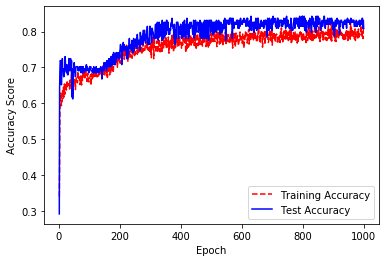

In [34]:
# Get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

https://chrisalbon.com/deep_learning/keras/visualize_performance_history/

In [35]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)



# # calculate predictions
# predictions = model.predict(X)
# # round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Resources 

http://neuralnetworksanddeeplearning.com/
    
http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

https://chrisalbon.com/deep_learning/keras/visualize_neural_network_architecture/